                 Model       MAE         MSE       RMSE        R2
0    Linear Regression  7.118087   81.216311   9.012009  0.472143
1  K-Nearest Neighbors  8.536074  125.912657  11.221081  0.181644
2        Decision Tree  9.812924  156.498705  12.509944 -0.017147
3        Random Forest  6.942358   68.365084   8.268318  0.555668
4              XGBoost  7.370536   72.540058   8.517045  0.528534
5                  SVR  8.511326  114.632074  10.706637  0.254961


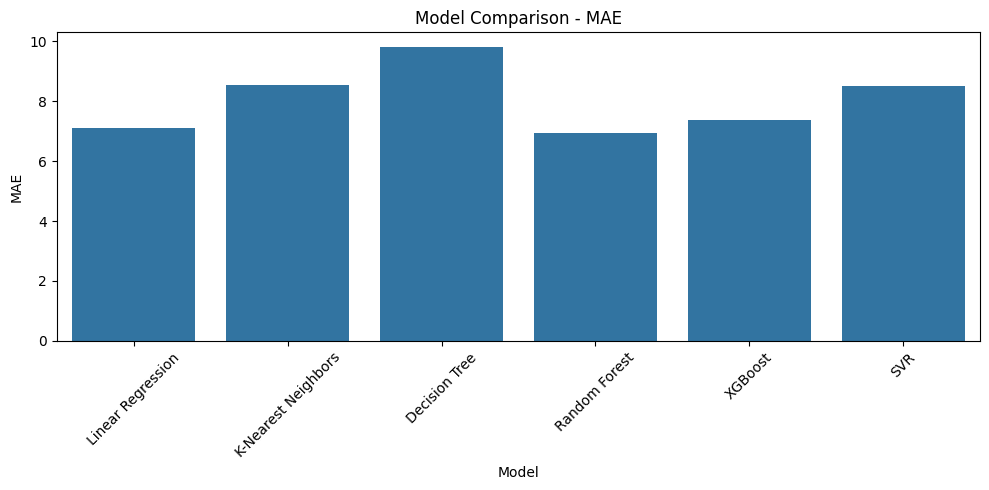

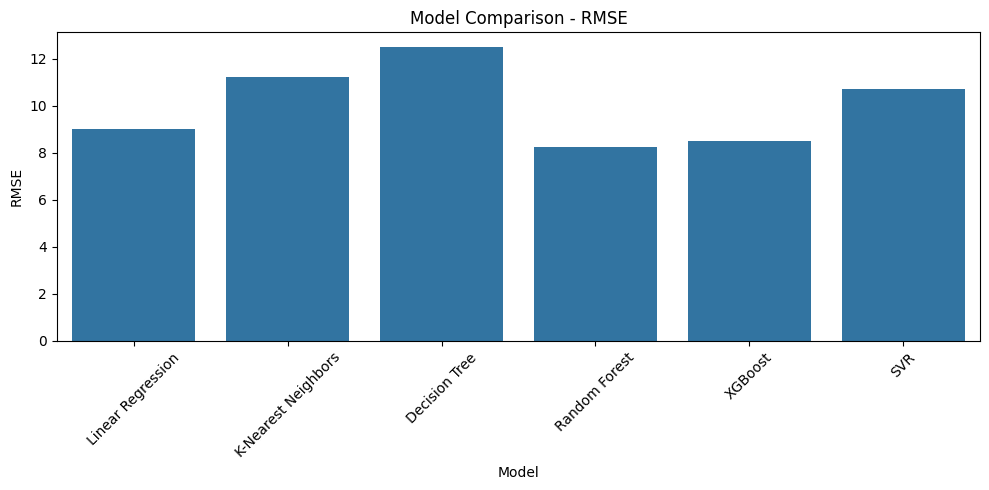

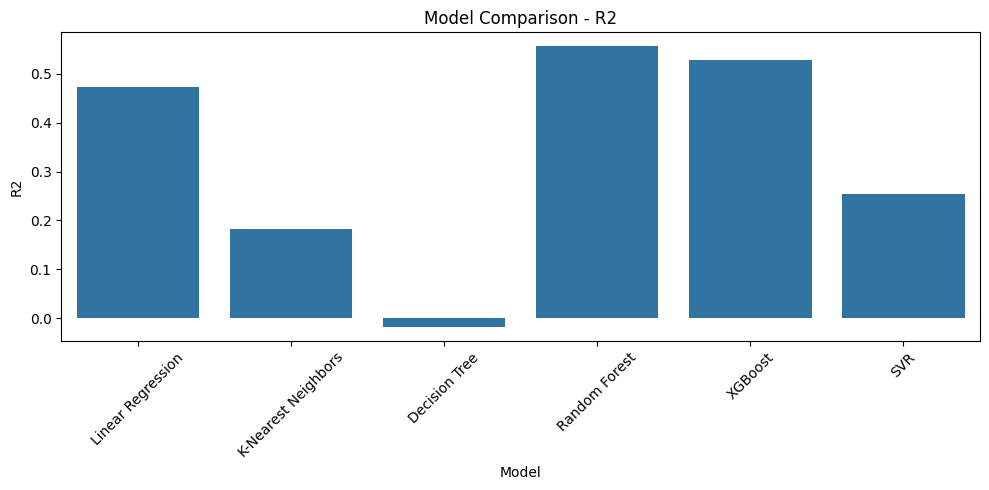

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# --- Simulated Data (Replace with your real data) ---
np.random.seed(0)
X = np.random.rand(100, 5)
y = 100 + np.dot(X, [10, -20, 5, 0, 15]) + np.random.normal(0, 10, 100)

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Initialize Models ---
models = {
    'Linear Regression': LinearRegression(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42),
    'SVR': SVR()
}

# --- Train & Evaluate Models ---
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)
    results.append([name, mae, mse, rmse, r2])

# --- Create DataFrame ---
model_results = pd.DataFrame(results, columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2'])
print(model_results)

# --- Plot Performance ---
metrics_to_plot = ['MAE', 'RMSE', 'R2']
for metric in metrics_to_plot:
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Model', y=metric, data=model_results)
    plt.title(f'Model Comparison - {metric}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
